#### Table of content
- <a href="#bar_chart">Bar chart</a>
- <a href="#stacked_bar_chart">Stacked bar chart</a>
- <a href="#grouped_bar_chart">Grouped bar chart</a>
- <a href="#dot_chart">Dot chart</a>
- <a href="#heatmap_for_quantity">Heatmap for quantity</a>

#### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data

In [22]:
data = sns.load_dataset('mpg')
data['origin'] = data['origin'].transform(lambda x: 'USA' if x == 'usa' else x[:1].upper()+x[1:])
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite


<h1 id="bar_chart">Bar chart</h1>

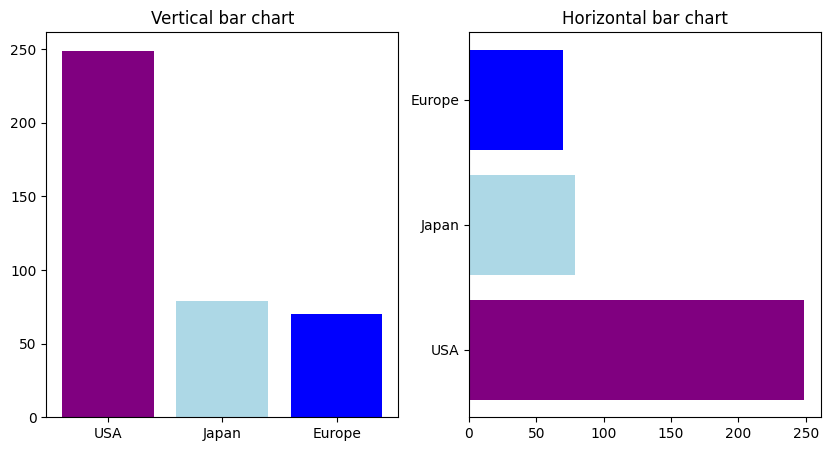

In [23]:
subset = data.groupby(['origin']).count()['mpg'].copy()
subset.sort_values(ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# vertical bar chart
ax1.bar(subset.index, subset, color=['purple', 'lightblue', 'blue'])
ax1.set_title("Vertical bar chart")

# horizontal bar chart
ax2.barh(subset.index, subset, color=['purple', 'lightblue', 'blue'])
ax2.set_title("Horizontal bar chart")

plt.show()

<h1 id="stacked_bar_chart">Stacked bar chart</h1>

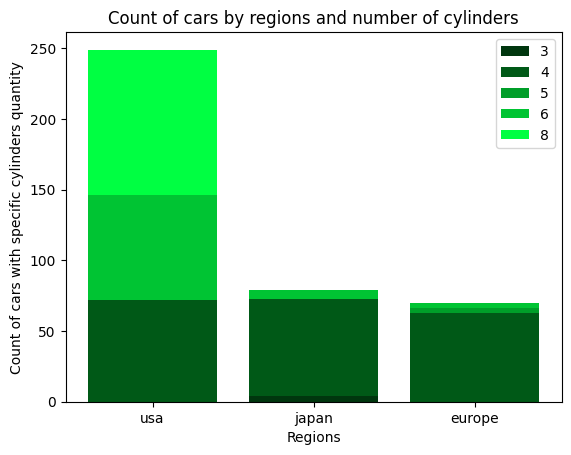

In [147]:
x = data.origin.unique()
y1 = data[data['cylinders'] == 3].groupby(['origin']).count()['mpg']
y2 = data[data['cylinders'] == 4].groupby(['origin']).count()['mpg']
y3 = data[data['cylinders'] == 5].groupby(['origin']).count()['mpg']
y4 = data[data['cylinders'] == 6].groupby(['origin']).count()['mpg']
y5 = data[data['cylinders'] == 8].groupby(['origin']).count()['mpg']
y1 = np.array([y1[continent] if continent in y1.index else 0 for continent in ['usa', 'japan', 'europe']])
y2 = np.array([y2[continent] if continent in y2.index else 0 for continent in ['usa', 'japan', 'europe']])
y3 = np.array([y3[continent] if continent in y3.index else 0 for continent in ['usa', 'japan', 'europe']])
y4 = np.array([y4[continent] if continent in y4.index else 0 for continent in ['usa', 'japan', 'europe']])
y5 = np.array([y5[continent] if continent in y5.index else 0 for continent in ['usa', 'japan', 'europe']])

colors = ["#00360e", "#005917", "#009e29", "#00c433", "#00ff42"]

plt.bar(x, y1, color=colors[0])
plt.bar(x, y2, color=colors[1], bottom=y1)
plt.bar(x, y3, color=colors[2], bottom=y1+y2)
plt.bar(x, y4, color=colors[3], bottom=y1+y2+y3)
plt.bar(x, y5, color=colors[4], bottom=y1+y2+y3+y4)

plt.title("Count of cars by regions and number of cylinders")
plt.xlabel('Regions')
plt.ylabel('Count of cars with specific cylinders quantity')
plt.legend([3, 4, 5, 6, 8])

plt.show()

#### Other shorter way to visualize bar plot using seaborn library:

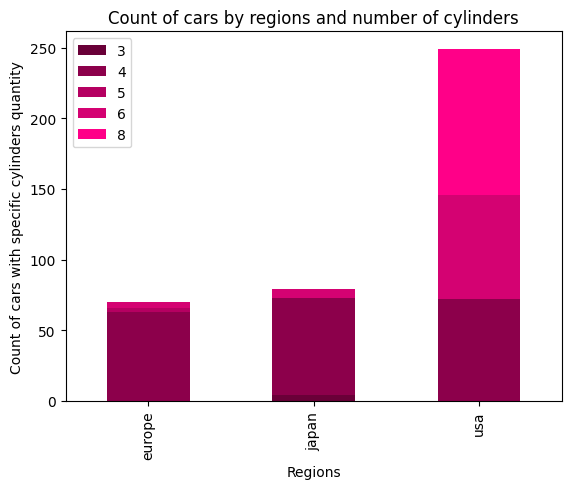

In [101]:
subset = pd.concat([data.origin, pd.get_dummies(data.cylinders, prefix='cylinder').astype("int16")], axis=1)
subset = subset.groupby('origin').sum()

colors = ["#690038", "#8c004b", "#b50061", "#d40272", "#ff0088"]
subset.plot(kind='bar', stacked=True, color=colors)
plt.title("Count of cars by regions and number of cylinders")
plt.xlabel('Regions')
plt.ylabel('Count of cars with specific cylinders quantity')
plt.legend([3, 4, 5, 6, 8])
plt.show()

<h1 id="grouped_bar_chart">Grouped bar chart</h1>

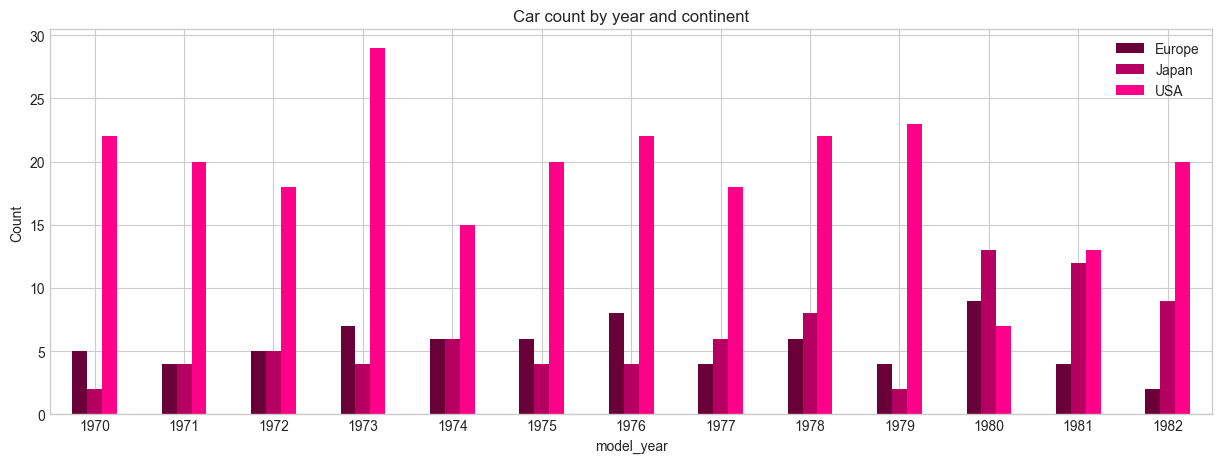

In [177]:
subset = pd.concat([data.model_year, pd.get_dummies(data.origin, prefix='origin').astype("int16")], axis=1)
subset = subset.groupby('model_year').sum()

colors = ["#690038", "#b50061", "#ff0088"]

subset.plot(kind='bar', color=colors, figsize=(15, 5))
plt.title("Car count by year and continent")
plt.ylabel('Count')
plt.legend(["Europe", "Japan", "USA"])
plt.xticks(np.arange(len(subset.index)), [f"19{date}" for date in subset.index], rotation=0)
plt.show()

<h1 id="dot_chart">Dot chart</h1>

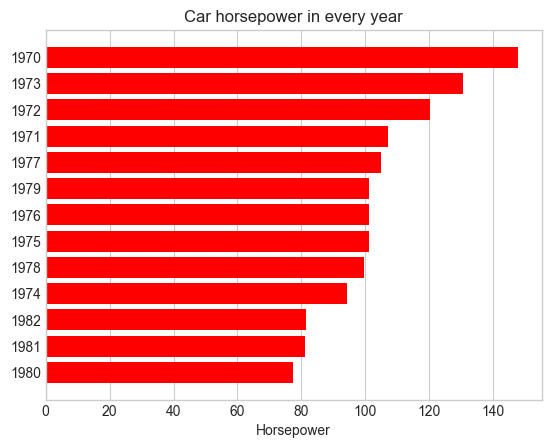

In [159]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.grid(axis='y')

subset = data[['model_year', 'horsepower']].groupby(['model_year']).mean()
subset.sort_values('horsepower', ascending=True, inplace=True)
subset = subset['horsepower']

plt.title("Car horsepower in every year")
plt.xlabel("Horsepower")
plt.barh([f"19{date}" for date in subset.index.astype(str).to_list()], subset, color='red')
plt.show()

#### Big horizontal lines don't look good, so let's use dot plots as alternative by bar plots

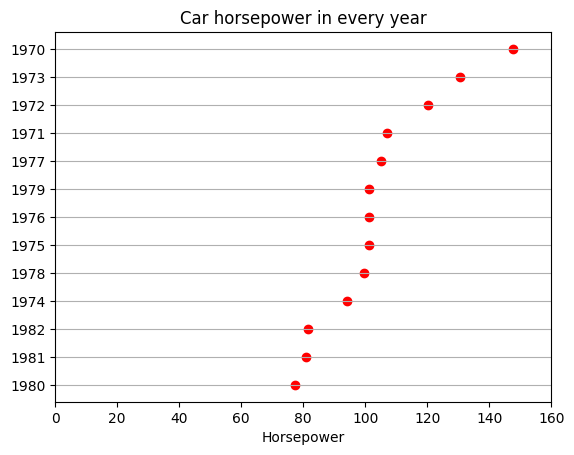

In [158]:
plt.style.use('default')
plt.grid(axis='y')

plt.title("Car horsepower in every year")
plt.xlabel("Horsepower")
plt.xlim(0, 160)
plt.scatter(subset, [f"19{date}" for date in subset.index.astype(str).to_list()], color='red')
plt.show()

<h1 id="heatmap_for_quantity">Heatmap for quantity</h1>

#### Data

Source <a href="https://www.kaggle.com/datasets/brendan45774/test-file">here</a>.

In [3]:
data = pd.read_csv("data/titanic.csv")
data = data[data['Age'].notnull()]

subset = data[['Survived', 'Pclass', 'Age']].reset_index(drop=True).copy()
subset['Age'] = subset['Age'].transform(lambda age: f'{int(age//10*10)}-{int(age//10*10+9)} yrs.')
subset = subset.groupby(["Pclass", "Age"]).mean()

subset = pd.concat([
    subset.loc[1].T,
    subset.loc[2].T,
    subset.loc[3].T
]).replace(np.nan, 0)

subset.index = ['First', 'Second', 'Third']

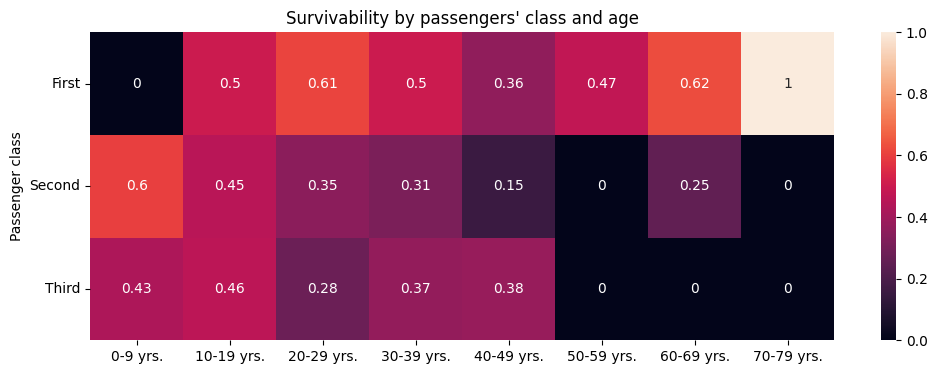

In [4]:
plt.figure(figsize=(12, 4))
sns.heatmap(subset, annot=True)
plt.title("Survivability by passengers' class and age")
plt.xlabel('')
plt.ylabel('Passenger class')
plt.yticks(rotation=0)
plt.show()